In [3]:
%matplotlib inline
#importing the required libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

#dowload the file 
file_id = '16DeG8mBHOMjYZYsuoc1r_7ivwMZf6mOA'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(download_url)
with open('heart_disease_health_indicators_BRFSS2015.csv', 'wb') as f:
    f.write(response.content)

# Read the CSV into a DataFrame
health_data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [5]:
health_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [7]:
# Convert appropriate columns to categorical
categorical_cols = [
    'HeartDiseaseorAttack', 'Sex', 'Education', 'Income', 'GenHlth', 'Age',
    'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'DiffWalk', 'CholCheck', 'HighBP', 'HighChol', 'Stroke', 'Diabetes'
]

for col in categorical_cols:
    if col in health_data.columns:
        health_data[col] = health_data[col].astype('category')
# Map 'all categories' values
if 'Sex' in health_data.columns:
    health_data['Sex'] = health_data['Sex'].cat.rename_categories({0: 'Female', 1: 'Male'})

if 'Age' in health_data.columns:
    health_data['Age']=health_data['Age'].cat.rename_categories({1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',11: '70-74', 12: '75-79', 13: '80 or older'})
if 'GenHlth' in health_data.columns:
    health_data['GenHlth']=health_data['GenHlth'].cat.rename_categories({ 1: 'excellent', 2: 'very good',  3: 'good', 4: 'fair',   5: 'poor'})
    
if 'Education' in health_data.columns:
    health_data['Education'] = health_data['Education'].cat.rename_categories({1: 'Never attended school or only kindergarten',
    2: 'Elementary',
    3: 'Grades 9 through 11',
    4: 'High school graduate',
    5: 'Some college or technical school',
    6: 'College graduate'})
if 'Income' in health_data.columns:
    health_data['Income'] = health_data['Income'].cat.rename_categories({1:'Less than $10',
    2: '$10-$15',
    3: '$15-$20',
    4: '$20-$25',
    5: '25-$35',
    6: '$35-$50',
    7: '$50-$75', 8: '$75 or more'})

In [9]:
health_data.head()#display the first 5 rows

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,poor,18,15,1,Female,60-64,High school graduate,$15-$20
1,0,0,0,0,25,1,0,0,1,0,...,0,1,good,0,0,0,Female,50-54,College graduate,Less than $10
2,0,1,1,1,28,0,0,0,0,1,...,1,1,poor,30,30,1,Female,60-64,High school graduate,$75 or more
3,0,1,0,1,27,0,0,0,1,1,...,1,0,very good,0,0,0,Female,70-74,Grades 9 through 11,$35-$50
4,0,1,1,1,24,0,0,0,1,1,...,1,0,very good,3,0,0,Female,70-74,Some college or technical school,$20-$25


In [11]:
#drop irrelevant columns
columns_to_drop = ['AnyHealthcare', 'NoDocbcCost']         
health_data = health_data.drop(columns=columns_to_drop)

In [13]:
#check for duplicates
health_data.duplicated().sum()
#drop the duplicated rows
health_data.drop_duplicates(inplace=True)

In [15]:
#final check 
health_data.duplicated().sum()

0

In [17]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228481 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  228481 non-null  category
 1   HighBP                228481 non-null  category
 2   HighChol              228481 non-null  category
 3   CholCheck             228481 non-null  category
 4   BMI                   228481 non-null  int64   
 5   Smoker                228481 non-null  category
 6   Stroke                228481 non-null  category
 7   Diabetes              228481 non-null  category
 8   PhysActivity          228481 non-null  category
 9   Fruits                228481 non-null  category
 10  Veggies               228481 non-null  category
 11  HvyAlcoholConsump     228481 non-null  category
 12  GenHlth               228481 non-null  category
 13  MentHlth              228481 non-null  int64   
 14  PhysHlth              228481 non-null  in

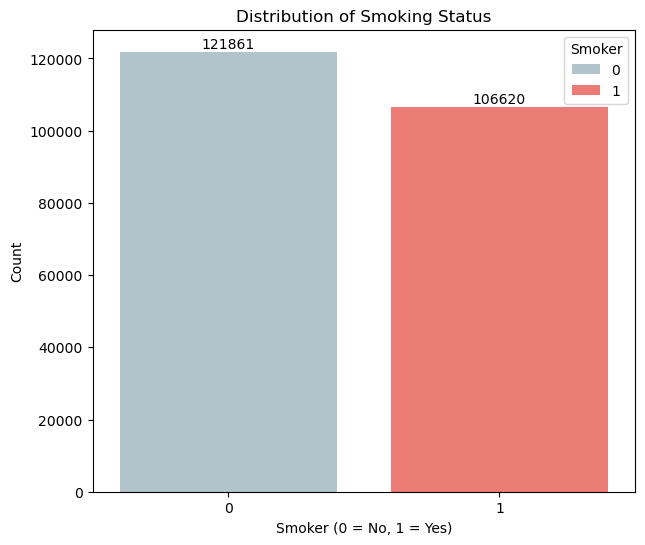

In [19]:
#Visualise the categorical variable
# Bar Chart - Smoker
plt.figure(figsize=(7, 6))
count=sns.countplot(x='Smoker',hue='Smoker', data=health_data, palette=['#AEC6CF','#FF6961'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Among the 228,481 survey respondents, 46.6% identified as heavy smokers, while the remaining 53.4% were not heavy smokers. This indicates that nearly half of the population engages in heavy smoking behavior—a critical lifestyle factor that could contribute significantly to adverse health outcomes, including heart disease.

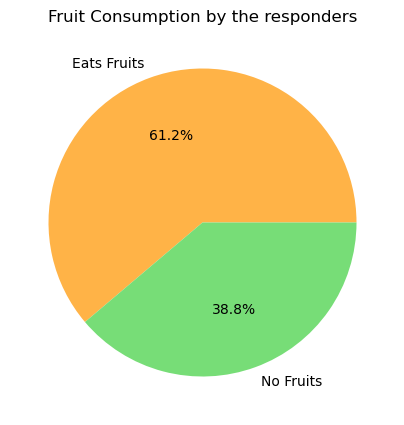

In [21]:
# Pie Chart - Fruits
fruit_counts = health_data['Fruits'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(fruit_counts, labels=fruit_counts.index.map({0: 'No Fruits', 1: 'Eats Fruits'}),
        autopct='%1.1f%%',colors=['#FFB347','#77DD77'])
plt.title('Fruit Consumption by the responders')
plt.show()

Approximately 39% of the respondents reported consuming fruits daily, while the remaining 61% do not include fruits in their daily diet. This highlights a potential area for dietary improvement, as regular fruit intake is linked to better cardiovascular health and overall well-being.

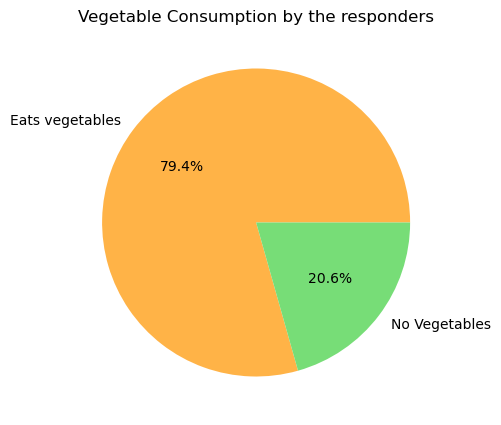

In [23]:
# Pie Chart - vegetables
veg_counts = health_data['Veggies'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(veg_counts, labels=fruit_counts.index.map({0: 'No Vegetables', 1: 'Eats vegetables'}),
        autopct='%1.1f%%',colors=['#FFB347','#77DD77'])
plt.title('Vegetable Consumption by the responders')
plt.show()

Aproximately 20.6% of the respondents reported consuming vegtables daily, while the remaining 79% do not include vegetables in their daily diet. This significant gap highlights a critical area for dietary improvement. Increasing vegetable intake can play a vital role in preventing chronic conditions, including heart disease, and promoting overall health.

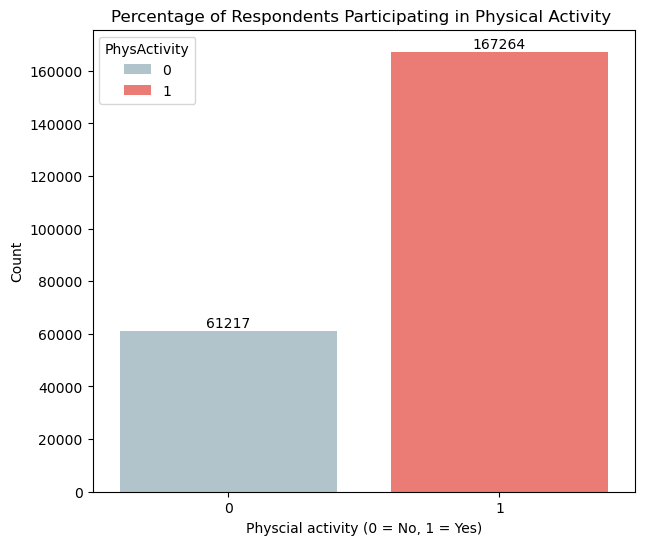

In [25]:
# Bar Chart - Physical Acitvity
plt.figure(figsize=(7, 6))
count=sns.countplot(x='PhysActivity',hue='PhysActivity', data=health_data, palette=['#AEC6CF','#FF6961'])
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Percentage of Respondents Participating in Physical Activity ')
plt.xlabel('Physcial activity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Approximately 73.2% of respondents engage in physical activity, which is a positive sign for heart health. Promoting activity among the remaining 26.8% could further reduce health risks.

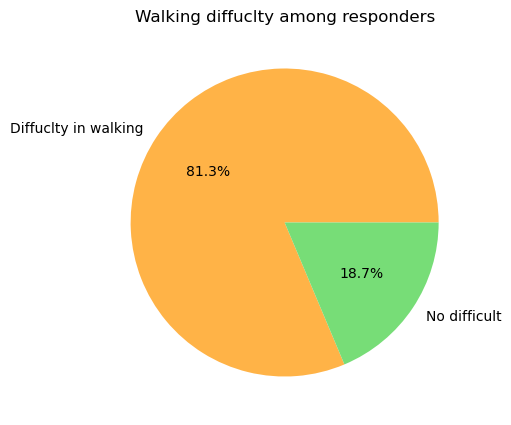

In [27]:
# Pie Chart - diffuclty in walking
veg_counts = health_data['DiffWalk'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(veg_counts, labels=fruit_counts.index.map({0: 'No difficult', 1: 'Diffuclty in walking'}),
        autopct='%1.1f%%',colors=['#FFB347','#77DD77'])
plt.title('Walking diffuclty among responders')
plt.show()

Among all respondents, only 18.7% reported difficulty in walking, indicating that a majority maintain good mobility—a positive indicator of overall physical health.

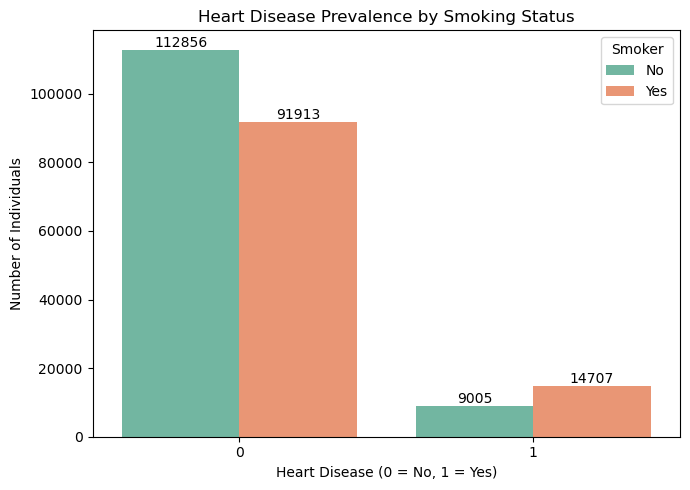

In [29]:
#comparison of heart disease among all categorical variables
 #Heart Disease by Smoking Status
plt.figure(figsize=(7, 5))
count=sns.countplot(x='HeartDiseaseorAttack', hue='Smoker', data=health_data, palette='Set2')
for container in count.containers:# for displaying the count
    count.bar_label(container)
plt.title('Heart Disease Prevalence by Smoking Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.legend(title='Smoker', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Among those with heart disease, 62% are smokers, while only 44.9% of non-heart disease individual’s smoke.• This indicates a strong positive correlation between smoking and heart disease.

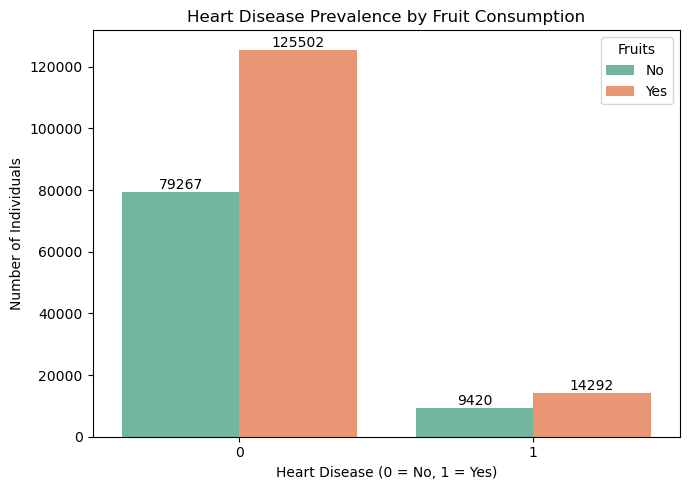

In [31]:
#Fruit consumption among heart diesease and non-disease patients
plt.figure(figsize=(7, 5))
count=sns.countplot(x='HeartDiseaseorAttack', hue='Fruits', data=health_data, palette='Set2')
for container in count.containers:# for displaying the count
    count.bar_label(container)
#bar chart labelling
plt.title('Heart Disease Prevalence by Fruit Consumption')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.legend(title='Fruits', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Consuming fruits in both heart disease and non-heart patients are high.

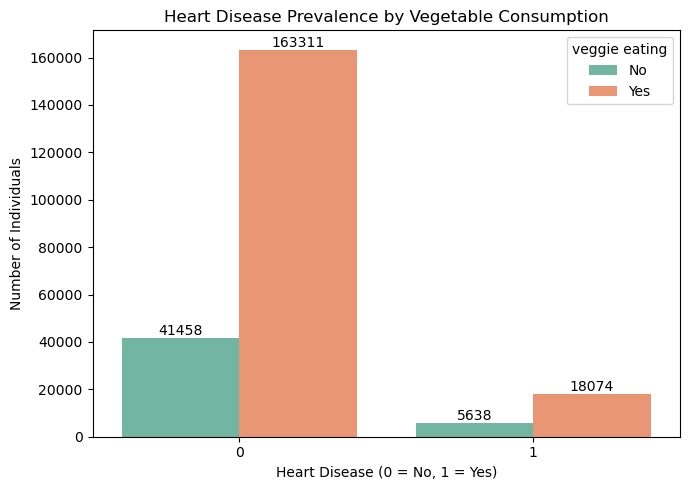

In [33]:
#Vegetable consumption among heart diesease and non-disease patients
plt.figure(figsize=(7, 5))
count=sns.countplot(x='HeartDiseaseorAttack', hue='Veggies', data=health_data, palette='Set2')
for container in count.containers:# for displaying the count
    count.bar_label(container)
#bar chart labelling
plt.title('Heart Disease Prevalence by Vegetable Consumption')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.legend(title='veggie eating', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

76% of heart disease patients eat vegetables daily, whearas  80% of non-heart disease individuals consumes veggies daily.

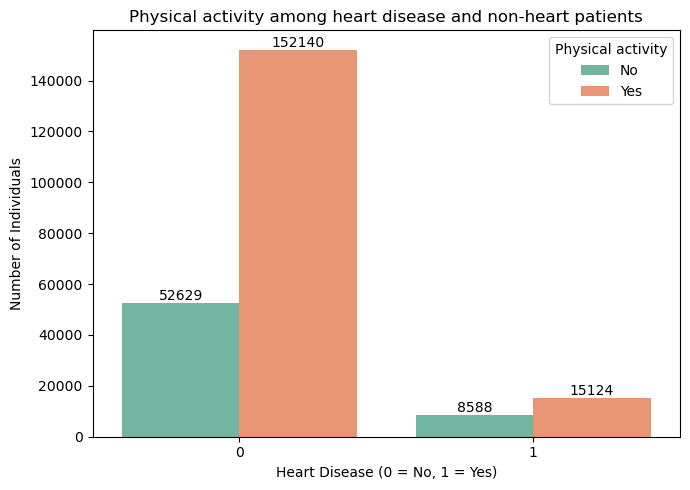

In [35]:
#Physical activity among heart diesease and non-disease patients
plt.figure(figsize=(7, 5))
count=sns.countplot(x='HeartDiseaseorAttack', hue='PhysActivity', data=health_data, palette='Set2')
for container in count.containers:# for displaying the count
    count.bar_label(container)
#bar chart labelling
plt.title('Physical activity among heart disease and non-heart patients')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Individuals')
plt.legend(title='Physical activity', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

A higher percentage of heart disease patients (36.2%) are physically inactive, compared to non-heart disease individuals (25.7%).

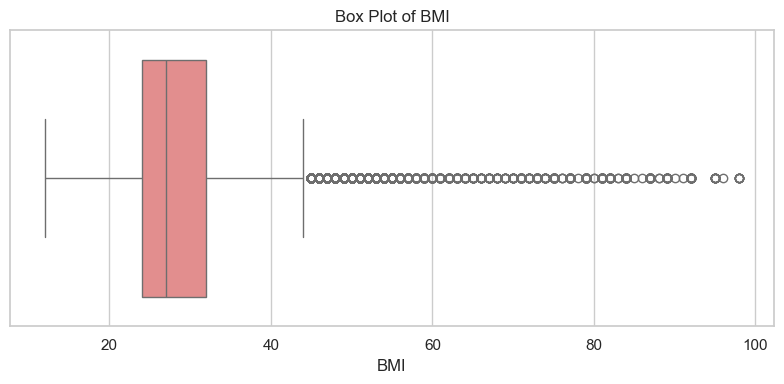

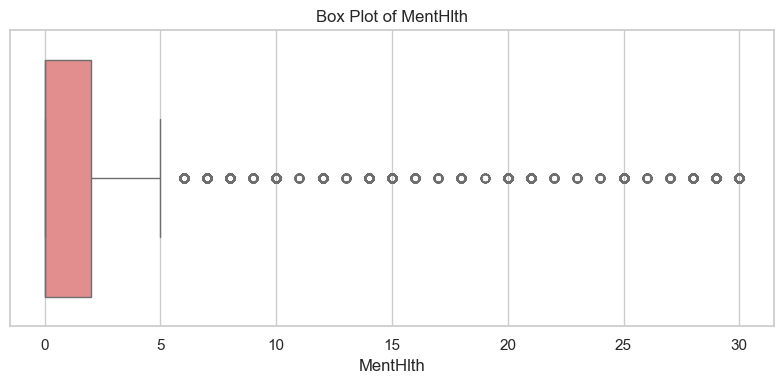

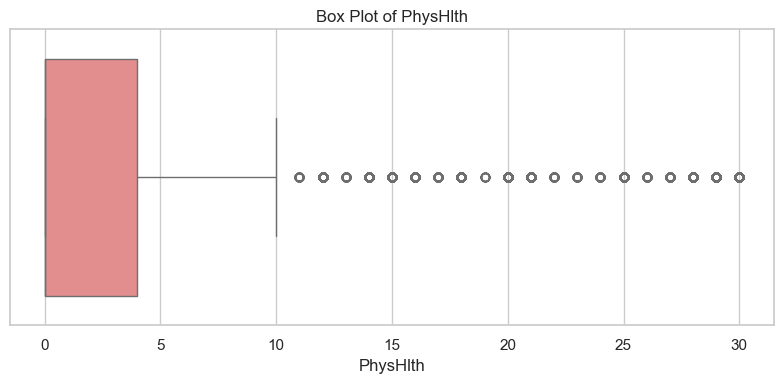

In [37]:
#distribution of continous varibales
# Set visual style
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth']

# Create box plots
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=health_data[var], color='lightcoral')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

#BMI
The interquartile range (IQR) of BMI falls roughly between 24 and 35, suggesting that most individuals fall in the overweight to obese category.
There is a significant number of outliers on the higher end, with values extending well beyond 45, and some even close to 100. These indicate individuals with extremely high BMI, which could be linked to a greater risk of chronic illnesses, including cardiovascular disease.
#mental health
    The distribution is right-skewed with a large number of outliers extending to the maximum value of 30 days, suggesting that a notable segment of the population experiences chronic mental health issues.

#physcial helath 
    The box plot shows that the majority of respondents experience 0–4 days of poor physical health in a month.

In [39]:
import numpy as np

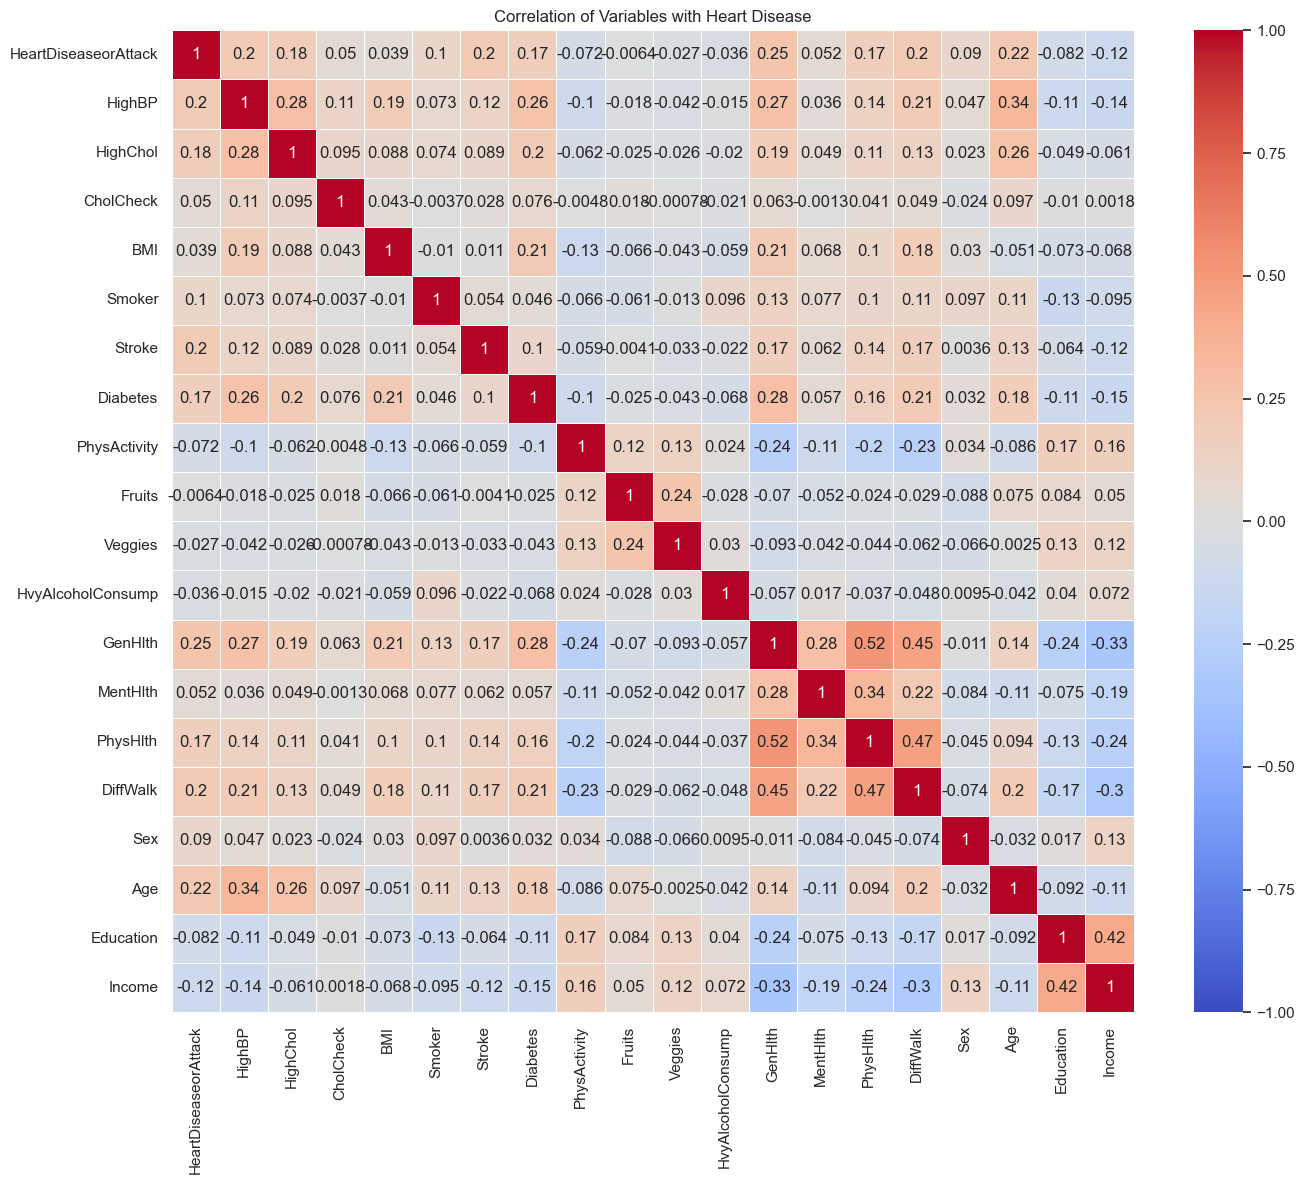

In [41]:
#Correlation among variables
#correlated heatmap accros all variables
# Encode categorical variables to numeric
encoded_data = health_data.copy()
for col in encoded_data.select_dtypes(['category']).columns:
    encoded_data[col] = encoded_data[col].cat.codes

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the filtered heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation of Variables with Heart Disease')
plt.tight_layout()
plt.show()

Strong positive correlations were observed between General Health and both Physical Health and difficulty in walking, highlighting that general health perception aligns with actual health conditions.

Moderate correlations among HighBP, HighChol, and Stroke support known cardiovascular comorbidity patterns.
Lifestyle factors such as Smoker, Fruits, and PhysActivity show weaker correlations individually, suggesting they contribute in combination rather than in isolation.
Income and education has negative correlation sugeestt=ing that when income or education is higher ,heart disease rate is less.
Top correlatated facts are,Physical health,idffuclty walking,general health,age,stroke,high BP,Diabetits and high cholestrol

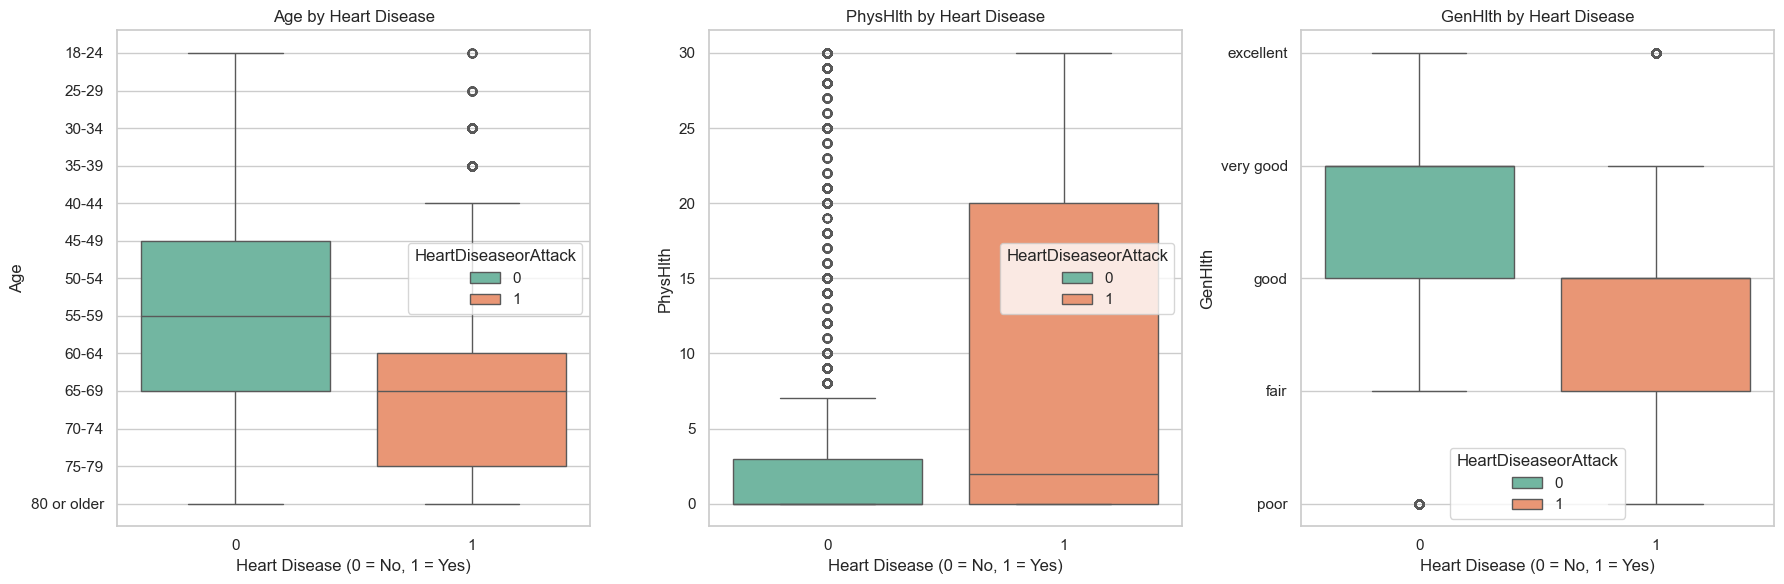

In [47]:

# Plot true continuous variables vs HeartDiseaseorAttack
continuous_vars = ['Age', 'PhysHlth', 'GenHlth']

plt.figure(figsize=(18, 6))
for i, var in enumerate(continuous_vars):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='HeartDiseaseorAttack', hue='HeartDiseaseorAttack', y=var, data=health_data, palette='Set2')
    plt.title(f'{var} by Heart Disease')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

C:\Users\sheme\AppData\Local\Temp\ipykernel_18620\2919265288.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_by_age = health_data.groupby('Age')['HeartDiseaseorAttack'].mean().reindex(age_order)
C:\Users\sheme\AppData\Local\Temp\ipykernel_18620\2919265288.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_by_edu = health_data.groupby('Education')['HeartDiseaseorAttack'].mean().reindex(education_order)
C:\Users\sheme\AppData\Local\Temp\ipykernel_18620\2919265288.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

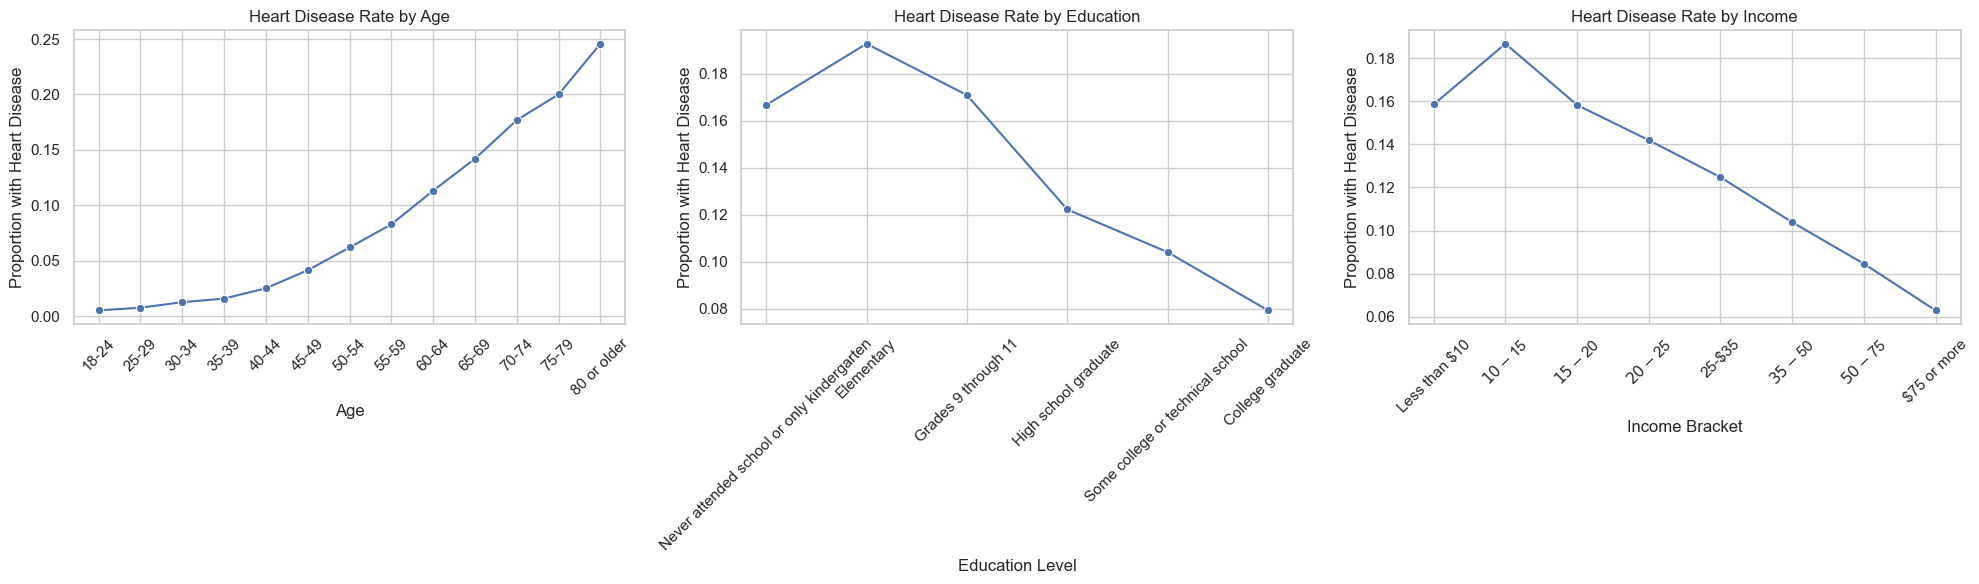

In [49]:
# Convert 'HeartDiseaseorAttack' to numeric (0/1) for aggregation
health_data['HeartDiseaseorAttack'] = health_data['HeartDiseaseorAttack'].astype(int)

# Define manual order for labels
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
             '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

education_order = ['Never attended school or only kindergarten', 'Elementary',
                   'Grades 9 through 11', 'High school graduate',
                   'Some college or technical school', 'College graduate']

income_order = ['Less than $10', '$10-$15', '$15-$20', '$20-$25',
                '25-$35', '$35-$50', '$50-$75', '$75 or more']

# Group and calculate proportion of heart disease
prop_by_age = health_data.groupby('Age')['HeartDiseaseorAttack'].mean().reindex(age_order)
prop_by_edu = health_data.groupby('Education')['HeartDiseaseorAttack'].mean().reindex(education_order)
prop_by_inc = health_data.groupby('Income')['HeartDiseaseorAttack'].mean().reindex(income_order)

# Plotting
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Age plot
sns.lineplot(x=age_order, y=prop_by_age.values, marker='o', ax=axes[0])
axes[0].set_title('Heart Disease Rate by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Proportion with Heart Disease')
axes[0].tick_params(axis='x', rotation=45)

# Education plot
sns.lineplot(x=education_order, y=prop_by_edu.values, marker='o', ax=axes[1])
axes[1].set_title('Heart Disease Rate by Education')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Proportion with Heart Disease')
axes[1].tick_params(axis='x', rotation=45)

# Income plot
sns.lineplot(x=income_order, y=prop_by_inc.values, marker='o', ax=axes[2])
axes[2].set_title('Heart Disease Rate by Income')
axes[2].set_xlabel('Income Bracket')
axes[2].set_ylabel('Proportion with Heart Disease')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Age 
positive trend between age and heart disease prevalence. As age increases, the proportion of individuals reporting heart disease rises steadily. The increase becomes more pronounced after age 50, indicating that middle-aged and older adults are at significantly higher risk.

#Education level 
There is an inverse relationship between education level and heart disease. The highest prevalence is observed among individuals with low or no formal education. As the education level increases, the rate of heart disease decreases, with college graduates showing the lowest rates. This trend suggests that education may play a protective role, potentially through better health awareness and access to preventive care.

#Income level
Heart disease prevalence is highest among low-income individuals, especially those earning less than $10,000 per year. As income increases, the proportion of individuals with heart disease declines. This pattern indicates that economic status is closely tied to cardiovascular health, possibly due to disparities in access to healthcare, nutrition, and stress levels.



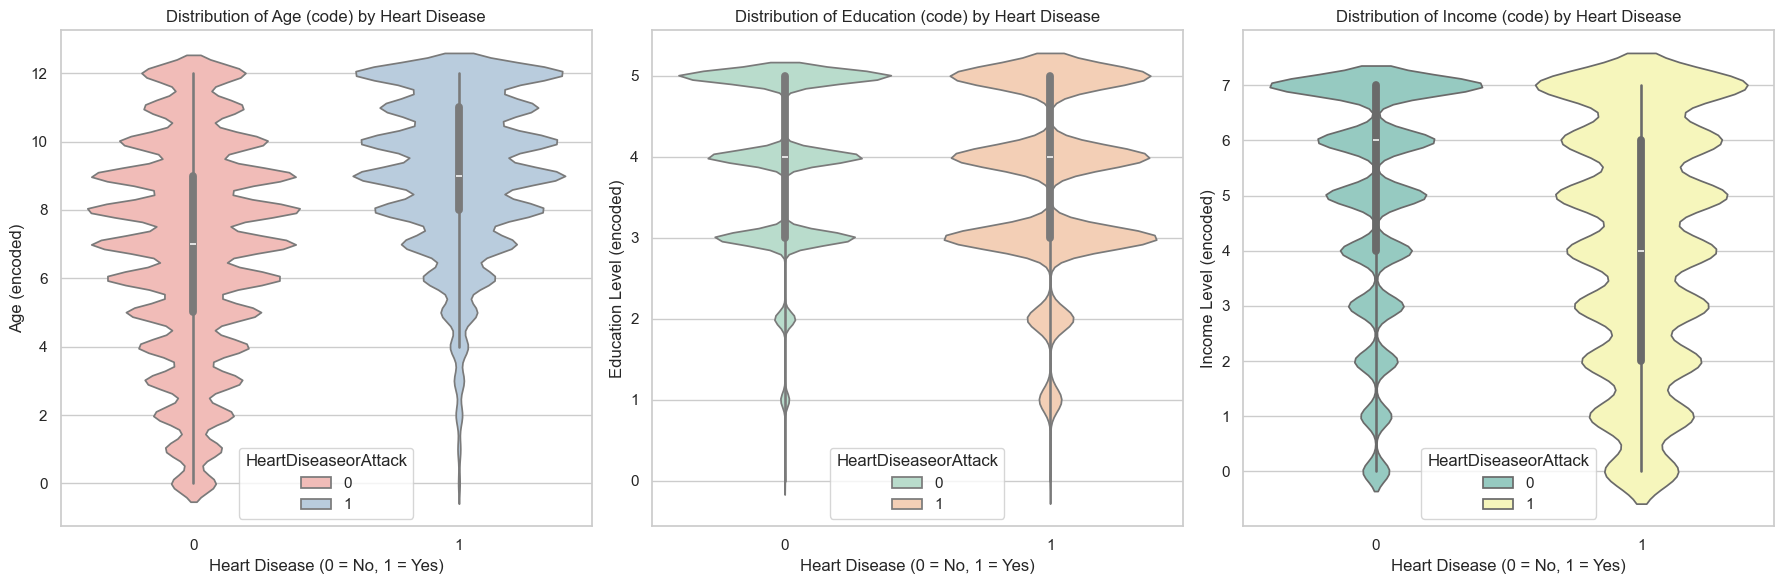

In [51]:
# Make a copy and encode categorical string columns
violin_data = health_data.copy()
for col in ['Age', 'Education', 'Income']:
    violin_data[col] = violin_data[col].astype('category').cat.codes
violin_data['HeartDiseaseorAttack'] = violin_data['HeartDiseaseorAttack'].astype(int)

# Plot violin plots
plt.figure(figsize=(18, 6))

# Violin: Age (as code) vs Heart Disease
plt.subplot(1, 3, 1)
sns.violinplot(x='HeartDiseaseorAttack', y='Age',hue='HeartDiseaseorAttack', data=violin_data, palette='Pastel1')
plt.title('Distribution of Age (code) by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age (encoded)')

# Violin: Education (as code) vs Heart Disease
plt.subplot(1, 3, 2)
sns.violinplot(x='HeartDiseaseorAttack', y='Education',hue='HeartDiseaseorAttack', data=violin_data, palette='Pastel2')
plt.title('Distribution of Education (code) by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Education Level (encoded)')

# Violin: Income (as code) vs Heart Disease
plt.subplot(1, 3, 3)
sns.violinplot(x='HeartDiseaseorAttack', y='Income',hue='HeartDiseaseorAttack', data=violin_data, palette='Set3')
plt.title('Distribution of Income (code) by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Income Level (encoded)')

plt.tight_layout()
plt.show()

These violin plots highlight the unequal distribution of heart disease across age, education, and income levels. They suggest that age, low education, and low income are strongly associated with a higher prevalence of heart disease—emphasizing the need for targeted awareness and intervention programs for at-risk groups.